In [ ]:
#Step 1: Setting up the environment
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Step 2: Load the dataset
#load dataset from file dataset_4.csv
data = pd.read_csv('dataset_4.csv')
print (data.head()) 

   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0   2.184037   0.483444  -1.591392   0.179448  -0.777793   0.109019   
1  -0.591096   0.993551   1.591419  -0.910918   1.575357  -0.728358   
2  -1.236405   0.136196  -0.851444   2.230818  -0.509955   0.411055   
3   1.804903   2.439023  -1.364115  -0.478763   1.121108  -0.956161   
4  -0.900630   0.132859  -0.876695  -0.109626  -3.672537  -3.026396   

   feature_7  feature_8  feature_9  feature_10  feature_11  feature_12  \
0  -0.049921   0.074199   0.456040    0.335273   -2.293120   -0.890799   
1   1.329193   3.104317  -0.287206    6.309714   -3.579595    3.105253   
2   1.948598  -2.117605  -0.708127    3.209020   -0.512379    2.441059   
3   0.362347  -1.506067   0.377364    0.426759   -1.036911    2.569059   
4   0.420026   1.356922  -0.806770   -3.209374    2.218018    1.961846   

   feature_13  feature_14  feature_15  feature_16  feature_17 target  
0    0.590665    0.811727   -2.241954    0.296051    0.32

In [13]:
# Step 3: Data Cleaning and Preprocessing
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
target        0
dtype: int64


In [14]:
# Encode the target variable (replace 'target_column' with the actual name of your target column)
target_column = 'target'  # Replace with the actual target column name
if data[target_column].dtype == 'object':
    label_encoder = LabelEncoder()
    data[target_column] = label_encoder.fit_transform(data[target_column])
    print("\nClasses in Target Column:", label_encoder.classes_)


Classes in Target Column: ['paper' 'rock' 'scissors']


In [15]:
# Step 4: Feature Selection and Train-Test Split
# Separate features (X) and target (y)
X = data.drop(columns=[target_column])
y = data[target_column]

In [16]:
# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Step 5: Train an SVM Model
# Initialize the SVM model with a linear kernel
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       158
           1       0.69      0.66      0.67        97
           2       0.73      0.53      0.62        45

    accuracy                           0.76       300
   macro avg       0.74      0.70      0.71       300
weighted avg       0.76      0.76      0.76       300


Accuracy Score: 0.7633333333333333


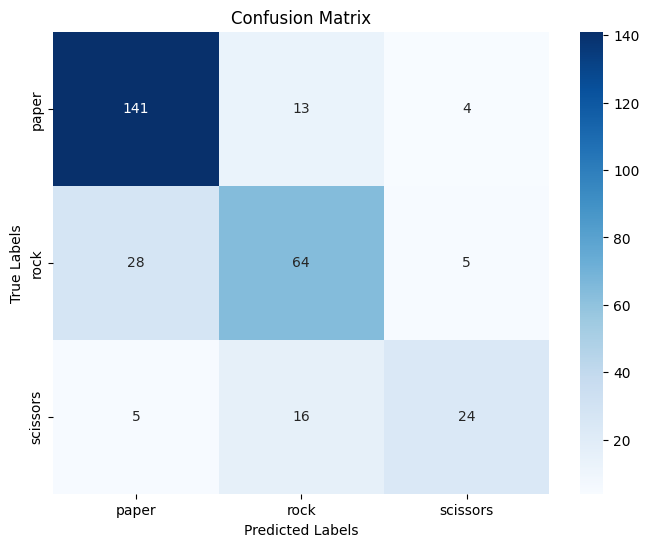

In [23]:
# Step 6: Make Predictions and Evaluate the Model
# Predict the target values for the test set
y_pred = svm_model.predict(X_test)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy Score:", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
